# Assocation Analysis - Task 1

In the first task I am looking at Association analysis for the OnlineRetail dataset provided. First all necessary imports will be handled.

In [28]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

import requests, os

xlUrl = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
xlFile = 'data/Online Retail.xlsx'
dataFile = xlFile
url = xlUrl
if not os.path.exists('data'):
    os.makedirs('data')
if not os.path.isfile(dataFile):
  r = requests.get(url)
  with open(dataFile, 'wb') as f:
    f.write(r.content)
if (dataFile == xlFile):
  df = pd.read_excel(dataFile)
else:
  df = pd.read_csv(dataFile)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


__Task 1.1__: Select the transactions arising from the `Country` having _9042_ records in the dataframe and convert them to the OneHotEncoded form, where each column has (0,1) values representing the (absence,presence) of that product in a given basket, where each basket (row) is labeled by its `InvoiceNo`.

First I group the dataframe by country column and size to determine Countries with greater than 9042 records.

In [29]:
df.groupby(['Country']).size()

Country
Australia                 1259
Austria                    401
Bahrain                     19
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      8196
European Community          61
Finland                    695
France                    8557
Germany                   9495
Greece                     146
Hong Kong                  288
Iceland                    182
Israel                     297
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1519
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533


From the results we see that 'United Kingdom' and 'Germany'have more than 9042 records each. We will use Germany for the analysis as this is the closest to the spec at 9495 records.

Next, I will perform one hot encoding on the dataframe, such that here each column has (0,1) values representing the (absence,presence) of that product in a given basket each basket (row) is labeled by its InvoiceNo

In [30]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

basket = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
 
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [31]:
basket_sets.head(5)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploratory Data Analysis

In [32]:
# sum to get number of True along each row (each transaction)
a = basket_sets.apply(lambda row: sum(row), axis=1)
a.head()

InvoiceNo
536527    14
536840    10
536861     9
536967     1
536983     8
dtype: int64

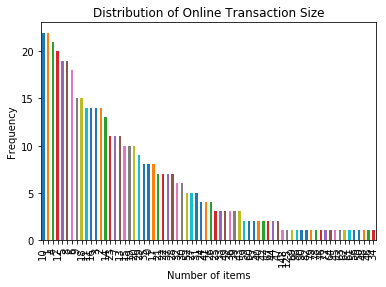

In [33]:
# Generate plot of count of the number of online transactions of the same size
a.value_counts().plot.bar()
plt.title("Distribution of Online Transaction Size")
plt.xlabel("Number of items")
plt.ylabel("Frequency")
plt.show()

In [34]:
# Output of data from value counts   
print(a.value_counts())

counts = a.value_counts()
counts[1]

10     22
1      22
4      21
12     20
5      19
8      19
6      18
9      15
18     15
11     14
16     14
3      14
2      14
14     13
23     11
7      11
13     11
15     10
19     10
20     10
29      9
35      8
0       8
17      8
21      7
22      7
37      7
28      7
32      6
30      6
       ..
39      3
43      3
59      2
60      2
57      2
40      2
42      2
67      2
44      2
47      2
148     1
125     1
69      1
98      1
90      1
82      1
79      1
78      1
76      1
72      1
64      1
45      1
63      1
62      1
61      1
56      1
50      1
48      1
46      1
34      1
Length: 70, dtype: int64


22

In [35]:
# We can generate a set of statistics about the size of transactions. 
a.describe()

count    457.000000
mean      18.908096
std       18.311039
min        0.000000
25%        6.000000
50%       14.000000
75%       26.000000
max      148.000000
dtype: float64

So from above tables and bar plot we see:

A total of 24 transactions contained only a single item, while one transaction had 146 items.
The first quartile and median purchase size are 1 and 10 items respectively, implying that 25 percent of transactions contained one or fewer items and about half contained more or less than ten items.
The mean value of 14.95 was collected.

__Task 1.2__: Use mlxtend's `apriori` function to find the frequent itemsets where the minimum support threshold is set to 0.02. Hence derive the association rules where the minimum lift threshold is 1.

#### Retrieval of Frequent Itemsets:

In [36]:
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

#### Association Rules

In [37]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print ("Generated {:,} rules".format(len(rules)))

Generated 738 rules


In [38]:
print(rules)

                                           antecedents  \
0                 (3 PIECE SPACEBOY COOKIE CUTTER SET)   
1                 (ROUND SNACK BOXES SET OF4 WOODLAND)   
2                             (6 RIBBONS RUSTIC CHARM)   
3                              (CHOCOLATE BOX RIBBONS)   
4                      (PLASTERS IN TIN CIRCUS PARADE)   
5                             (6 RIBBONS RUSTIC CHARM)   
6                           (REGENCY CAKESTAND 3 TIER)   
7                             (6 RIBBONS RUSTIC CHARM)   
8                  (ROUND SNACK BOXES SET OF 4 FRUITS)   
9                             (6 RIBBONS RUSTIC CHARM)   
10                (ROUND SNACK BOXES SET OF4 WOODLAND)   
11                            (6 RIBBONS RUSTIC CHARM)   
12                         (SCANDINAVIAN REDS RIBBONS)   
13                            (6 RIBBONS RUSTIC CHARM)   
14                            (6 RIBBONS RUSTIC CHARM)   
15                        (SET OF 3 REGENCY CAKE TINS)   
16            

In [39]:
# get stats on objective measures
rules[["support","confidence", "lift"]].describe()

,support,confidence,lift
count,738.000000,738.000000,738.000000
mean,0.028067,0.408796,5.786787
std,0.009774,0.231677,5.338703
min,0.021882,0.089286,1.108245
25%,0.021882,0.207547,2.493552
50%,0.024070,0.375000,3.554444
75%,0.030635,0.551293,6.566092
max,0.131291,1.000000,38.083333


In [40]:
# order rules by lift
rules.sort_values(by='lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
126,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.024070,0.026258,0.024070,1.000000,38.083333,0.023438,inf
127,(DOLLY GIRL CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.026258,0.024070,0.024070,0.916667,38.083333,0.023438,11.711160
69,(PINK VINTAGE SPOT BEAKER),(BLUE VINTAGE SPOT BEAKER),0.024070,0.030635,0.024070,1.000000,32.642857,0.023333,inf
68,(BLUE VINTAGE SPOT BEAKER),(PINK VINTAGE SPOT BEAKER),0.030635,0.024070,0.024070,0.785714,32.642857,0.023333,4.554340
45,(BLUE OWL SOFT TOY),(PINK OWL SOFT TOY),0.032823,0.028446,0.021882,0.666667,23.435897,0.020948,2.914661


We can see that there are quite a few rules with a high lift value which means that it occurs more frequently than would be expected given the number of transaction and product combinations. We can also see several where the confidence is high as well.

__Task 1.3__: Defining the _rule length_ to be the total number of products in the rule, plot the distribution of association rules by rule length and explain why the distribution looks like it does. Choosing the _longest_ rules, find the most attractive rule for use when recommending a (set of) products to a customer. Explain why reversing the rule might not be as effective.

In [41]:
# add new columnn storing the rule length
rules["rule_len"] = rules.apply(lambda row: len(row["antecedents"])+len(row["consequents"]), axis=1)

In [42]:
# get stats on rules grouped by rule length
rules[["rule_len","support", "lift"]].groupby("rule_len").agg(['mean', 'count']).reset_index()

rule_len   support            lift      
                mean count      mean count
0        2  0.029303   460  5.777915   460
1        3  0.026010   264  5.824470   264
2        4  0.026258    14  5.367698    14

In [43]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule_len
0,(3 PIECE SPACEBOY COOKIE CUTTER SET),(ROUND SNACK BOXES SET OF4 WOODLAND),0.041575,0.245077,0.021882,0.526316,2.147556,0.011693,1.593727,2
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.245077,0.041575,0.021882,0.089286,2.147556,0.011693,1.052388,2
2,(6 RIBBONS RUSTIC CHARM),(CHOCOLATE BOX RIBBONS),0.102845,0.037199,0.021882,0.212766,5.719650,0.018056,1.223017,2
3,(CHOCOLATE BOX RIBBONS),(6 RIBBONS RUSTIC CHARM),0.037199,0.102845,0.021882,0.588235,5.719650,0.018056,2.178806,2
4,(PLASTERS IN TIN CIRCUS PARADE),(6 RIBBONS RUSTIC CHARM),0.115974,0.102845,0.024070,0.207547,2.018065,0.012143,1.132125,2


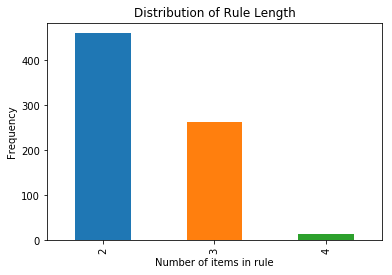

In [44]:
# Generate plot of distribution of association rules by rule length
rules['rule_len'].value_counts().plot.bar()
plt.title("Distribution of Rule Length")
plt.xlabel("Number of items in rule")
plt.ylabel("Frequency")
plt.show()

In [45]:
# Confirm the values presented by rule length
rules['rule_len'].unique()

array([2, 3, 4])

### Distribution Results:
The above distribution results show that we have three distinctive rule length goupings for the association rules. These are rule lengths of two, three and four products in each rule. These were obtained by combining the antecendent(purchased product) row results with the consequent(predicted product) row results.

2 products per rule appears to be the most common association rule, meaning that one product has predicted another product in over 450 + cases. The least common association rule was rules containined four products between antecedent and consequent, with only 14 results. This rule length group(4) is the Longest Rule type, which we will use in the final section of analysis below.

### Longest Rule Analysis

In [46]:
# restrict analysis to rules of length 4, the longest rule length and order rules by lift
longest_rules = rules[rules["rule_len"]==4].sort_values(by='lift',ascending=False)
longest_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule_len
728,"(PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BO...","(PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK...",0.056893,0.048140,0.026258,0.461538,9.587413,0.023519,1.767740,4
733,"(PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK...","(PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BO...",0.048140,0.056893,0.026258,0.545455,9.587413,0.023519,2.074836,4
730,"(PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BO...","(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...",0.050328,0.074398,0.026258,0.521739,7.012788,0.022514,1.935349,4
731,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...","(PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BO...",0.074398,0.050328,0.026258,0.352941,7.012788,0.022514,1.467675,4
727,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...",(PLASTERS IN TIN CIRCUS PARADE),0.041575,0.115974,0.026258,0.631579,5.445879,0.021437,2.399500,4


In [47]:
print(len(longest_rules))  

14


In [48]:
# In order to find the most attractive rule for use when recommending a (set of) products to a customer, we take the highest ranked lift value for long rule.
longest_rules.iloc[0]

antecedents           (PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BO...
consequents           (PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK...
antecedent support                                            0.0568928
consequent support                                              0.04814
support                                                       0.0262582
confidence                                                     0.461538
lift                                                            9.58741
leverage                                                      0.0235194
conviction                                                      1.76774
rule_len                                                              4
Name: 728, dtype: object

In [49]:
longest_rules.iloc[0].antecedents

frozenset({'PLASTERS IN TIN CIRCUS PARADE',
           'ROUND SNACK BOXES SET OF4 WOODLAND'})

In [50]:
longest_rules.iloc[0].consequents

frozenset({'PLASTERS IN TIN WOODLAND ANIMALS',
           'ROUND SNACK BOXES SET OF 4 FRUITS'})

### Most Attractive Rule
We determined the most attractive rule by ordering the result set by lift value. High lift values (Expected Confidence) have been detemirned to indicate the strongest rules in the association result set.


#### Summary:
For the result set for most attractive rule, we can see that (PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND) and (PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF 4 FRUITS) are commonly bought as together. These items have common themes in that they are types of the same thing i.e. the plasters theme and snack boxes theme mirror each other with representations of woodland / fruit or circus / animal pairings.

#### Support:
The support value for the first rule is 0.026258. This number is calculated by dividing the number of transactions containing (PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND) divided by total number of transactions. 

#### Confidence:
The confidence level for the rule is 0.461538 which shows that out of all the transactions that contain (PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND), 46.15% of the transactions also contain (PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF 4 FRUITS). 

#### Lift:
Finally, the lift of 9.587413 tells us that (PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF 4 FRUITS) are 9.58 times more likely to be bought by the customers who buy (PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND) compared to the default likelihood of the sale of (PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF 4 FRUITS) on their own.

### Rule Reversal
Reversing the association rule detailed above may not be as effective for the following reasons:

* At its core we are calculating if {A} then {B}. When we reverse this to be if {B} then {A} we are changing all of the algorithm values including lift, support and confidence. This could result in a lower confidence and lift result. The ratio division may not be as strong.
* Depending on the item(s) they may introduce other consequents when used as the antecedent, which again will change the outputs.
* This rule is predicting likelihood of {B} so predicting likelihood of {A} will not give the same output.